## **CO2 Emmisions**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv(r"/content/drive/MyDrive/teto üretim consulting A.Ş/CO2 Emissions.csv")


In [ ]:
dataset

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
target_encoded_cols = ['Model', 'Make', 'Vehicle Class', 'Transmission']
target_col = 'CO2 Emissions(g/km)'

encoder = TargetEncoder()
df[target_encoded_cols] = encoder.fit_transform(df[target_encoded_cols], df[target_col])


In [ ]:
df = pd.get_dummies(df, columns=['Fuel Type'], drop_first=True)

In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,223.800534,237.757439,216.679061,2.0,4,266.423091,9.9,6.7,8.5,33,196,0,0,0,1
1,223.800534,237.757439,216.679061,2.4,4,232.149834,11.2,7.7,9.6,29,221,0,0,0,1
2,223.800534,234.614439,216.679061,1.5,4,192.943874,6.0,5.8,5.9,48,136,0,0,0,1
3,223.800534,251.159167,236.292523,3.5,6,240.172961,12.7,9.1,11.1,25,255,0,0,0,1
4,223.800534,248.960322,236.292523,3.5,6,240.172961,12.1,8.7,10.6,27,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,230.057076,245.536971,236.292523,2.0,4,263.189926,10.7,7.7,9.4,30,219,0,0,0,1
7381,230.057076,248.556813,236.292523,2.0,4,263.189926,11.2,8.3,9.9,29,232,0,0,0,1
7382,230.057076,250.040434,236.292523,2.0,4,263.189926,11.7,8.6,10.3,27,240,0,0,0,1
7383,230.057076,247.559226,304.836735,2.0,4,263.189926,11.2,8.3,9.9,29,232,0,0,0,1


In [ ]:
xx = df.drop(target_col, axis=1)
yy = df[target_col]
x=np.asarray(xx).astype(np.float32)
y=np.asarray(yy).astype(np.float32)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=100)

In [ ]:
ytest

array([244., 334., 217., ..., 216., 359., 227.], dtype=float32)

In [ ]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    Sequential()
]

best_model = None
best_r2 = 0

for model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(xtrain, ytrain)

    y_pred = pipeline.predict(xtest)

    r2 = r2_score(ytest, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f"{model.__class__.__name__} - R2 Score: {r2}")

print(f"The best performing model is: {best_model} with accuracy: {best_r2}")

LinearRegression - R2 Score: 0.9927141732938094
RandomForestRegressor - R2 Score: 0.9971140556914125
DecisionTreeRegressor - R2 Score: 0.9965381580840297
The best performing model is: RandomForestRegressor with accuracy: 0.9971140556914125


In [ ]:
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())

param_grid = {
    'randomforestregressor__n_estimators': [200],
    'randomforestregressor__max_depth': [None],
    'randomforestregressor__min_samples_split': [2],
    'randomforestregressor__min_samples_leaf': [1],
    'randomforestregressor__max_features': ['sqrt'],
    'randomforestregressor__bootstrap': [ False],
    'randomforestregressor__n_jobs': [-1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(xtrain, ytrain)

best_params = grid_search.best_params_

In [ ]:
best_params

{'randomforestregressor__bootstrap': False,
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__n_jobs': -1}

In [ ]:
model = RandomForestRegressor(
    bootstrap=False,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    n_jobs=-1)

model.fit(xtrain, ytrain)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200,
                      n_jobs=-1)

Fuel Consumption Comb (L/100 km): 0.22384533459957953
Fuel Consumption Comb (mpg): 0.18902169054911389
Model: 0.15834095839802367
Fuel Consumption City (L/100 km): 0.12192146759531272
Fuel Consumption Hwy (L/100 km): 0.09897359730211616
Engine Size(L): 0.08135906589079661
Cylinders: 0.06067095689478277
Fuel Type_E: 0.018680428852262787
Vehicle Class: 0.01677972388233018
Make: 0.014404765484562373
Transmission: 0.007403355252781298
Fuel Type_X: 0.004242103994819057
Fuel Type_Z: 0.004241723720696128
Fuel Type_N: 0.00011482758282287356


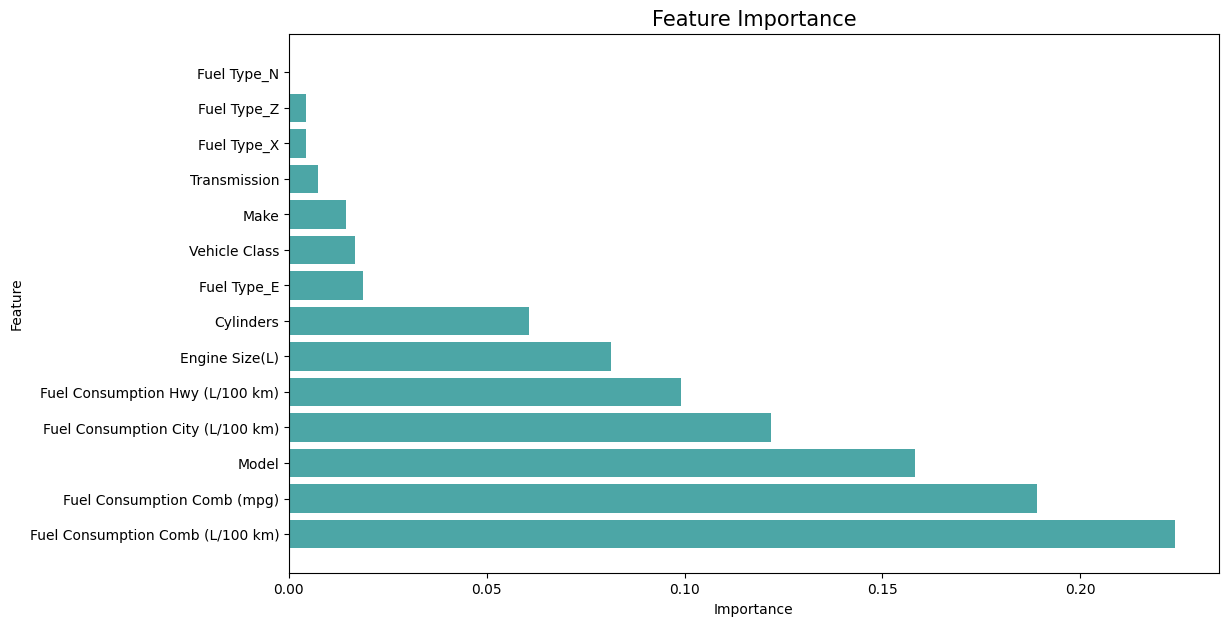

In [ ]:
importances = model.feature_importances_

feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importance), alpha=0.7, color='teal')
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
ytest

array([244., 334., 217., ..., 216., 359., 227.], dtype=float32)

In [ ]:
predictions = model.predict(xtest)
r2 = r2_score(ytest, predictions)
mse = mean_squared_error(ytest, predictions)

In [ ]:
predictions

array([244.0575    , 331.11833333, 217.8       , ..., 216.04      ,
       359.345     , 226.4       ])

In [ ]:
a= np.subtract(ytest, predictions)
b = np.square(a)
Sum = np.sum(b)
mse = Sum/len(predictions)
mse

9.094468248630745

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 9.094468248630744
R2 Score: 0.997303686177766


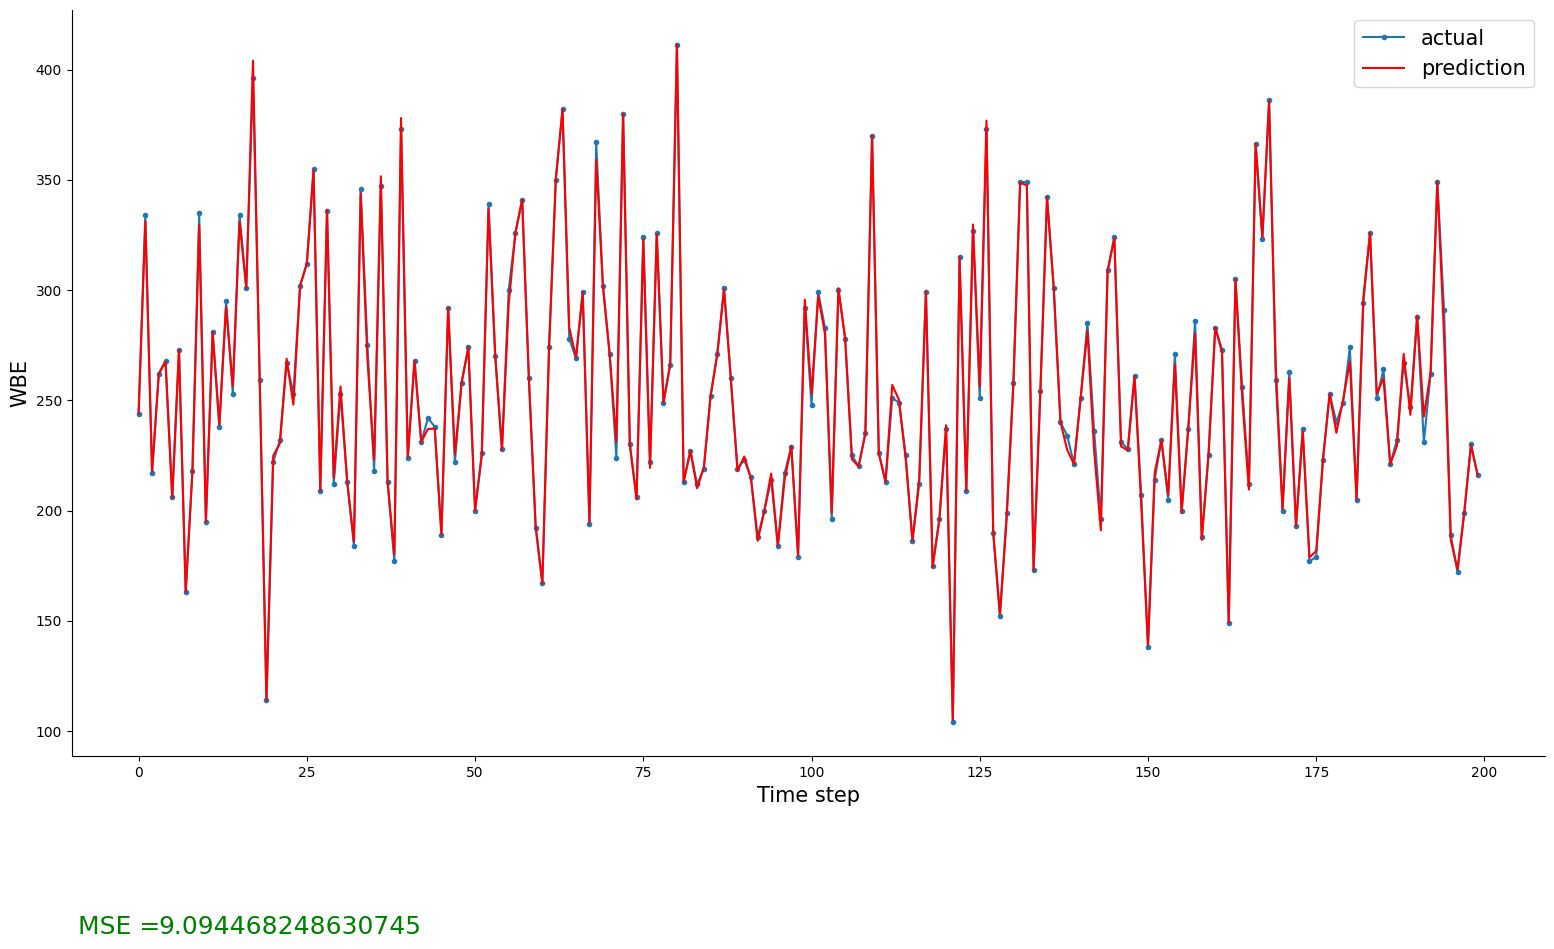

In [ ]:
aa=[x for x in range(200)]
plt.figure(figsize=(16,8))
plt.plot(aa, ytest[:200], marker='.', label="actual")
plt.plot(aa, predictions[:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('WBE', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

plt.xlabel('Time step', size=15)
plt.text(-9, 8, 'MSE =',
         fontsize = 18, color = 'g')
plt.text(3, 8, mse,
         fontsize = 18, color = 'g')
plt.show();